In [1]:
# not modified

# ========================
# MODIFY THESE PARAMETERS
# ========================

# Reynolds number: Valid options are 1e4, 5e4, 1e5, 5e5
Re = 5e5

# Schmidt number: Valid options are 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0
Sc = 2.0e-1

# Initial condition index: 0-39
ic_index = 0

print(f"Target simulation:")
print(f"  Reynolds number: {Re:.0e}")
print(f"  Schmidt number: {Sc:.1f}")
print(f"  Initial condition: {ic_index}")

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import urllib.request
import os

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported")

# Construct filename from parameters
filename = f'shearflow_1d_profiles_Re{Re:.0e}_Sc{Sc:.1e}_ic{ic_index}.npz'

# Check if file exists locally
if not Path(filename).exists():
    print(f"📥 File not found locally: {filename}")
    print(f"   Attempting to download from GitHub repository...")

    # Construct GitHub raw URL
    github_base = "https://raw.githubusercontent.com/natrask/ENM5320-2026/main/NewMaterial/shearflow_project/"
    github_url = github_base + filename

    try:
        print(f"   URL: {github_url}")
        print(f"   Downloading... (this may take a minute for large files)")

        # Download the file
        urllib.request.urlretrieve(github_url, filename)

        file_size_mb = os.path.getsize(filename) / (1024**2)
        print(f"   ✓ Download complete! ({file_size_mb:.2f} MB)")
        print(f"   Saved to: {Path.cwd() / filename}")

    except urllib.error.HTTPError as e:
        print(f"   ❌ Download failed: {e}")
        print(f"\n   This file may not exist in the repository yet.")
        print(f"   Please run shearflow_preprocessing.ipynb to generate it,")
        print(f"   or choose different parameters (Re, Sc, ic_index).")
        raise FileNotFoundError(f"Could not find or download {filename}")
    except Exception as e:
        print(f"   ❌ Unexpected error: {e}")
        raise
else:
    print(f"✓ Found file locally: {filename}")

# Load the data
data = np.load(filename)

print(f"\n✓ Data loaded successfully")
print(f"\nAvailable keys in NPZ file:")
for key in data.keys():
    if isinstance(data[key], np.ndarray):
        print(f"  {key:20s}: shape={str(data[key].shape):20s} dtype={data[key].dtype}")
    else:
        print(f"  {key:20s}: {data[key]}")

# Extract basic info
print(f"\nSimulation parameters:")
print(f"  Reynolds number: {data['Re']}")
print(f"  Schmidt number: {data['Sc']}")
print(f"  Initial condition: {data['ic_index']}")

print(f"\nData dimensions:")
print(f"  Time steps: {len(data['time'])}")
print(f"  Spatial points: {len(data['x'])}")
print(f"  Time range: [{data['time'][0]:.2f}, {data['time'][-1]:.2f}]")
print(f"  Spatial range: [{data['x'][0]:.2f}, {data['x'][-1]:.2f}]")

Target simulation:
  Reynolds number: 5e+05
  Schmidt number: 0.2
  Initial condition: 0
✓ Libraries imported
📥 File not found locally: shearflow_1d_profiles_Re5e+05_Sc2.0e-01_ic0.npz
   Attempting to download from GitHub repository...
   URL: https://raw.githubusercontent.com/natrask/ENM5320-2026/main/NewMaterial/shearflow_project/shearflow_1d_profiles_Re5e+05_Sc2.0e-01_ic0.npz
   Downloading... (this may take a minute for large files)
   ✓ Download complete! (2.42 MB)
   Saved to: c:\Users\nattr\OneDrive\Desktop\GitRepos\ENM5320-Spring2026\ENM5320-2026\NewMaterial\fullNonlinearSolve\shearflow_1d_profiles_Re5e+05_Sc2.0e-01_ic0.npz

✓ Data loaded successfully

Available keys in NPZ file:
  time                : shape=(200,)               dtype=float64
  x                   : shape=(512,)               dtype=float32
  tracer_mean         : shape=(200, 512)           dtype=float32
  tracer_std          : shape=(200, 512)           dtype=float32
  Re                  : shape=()           

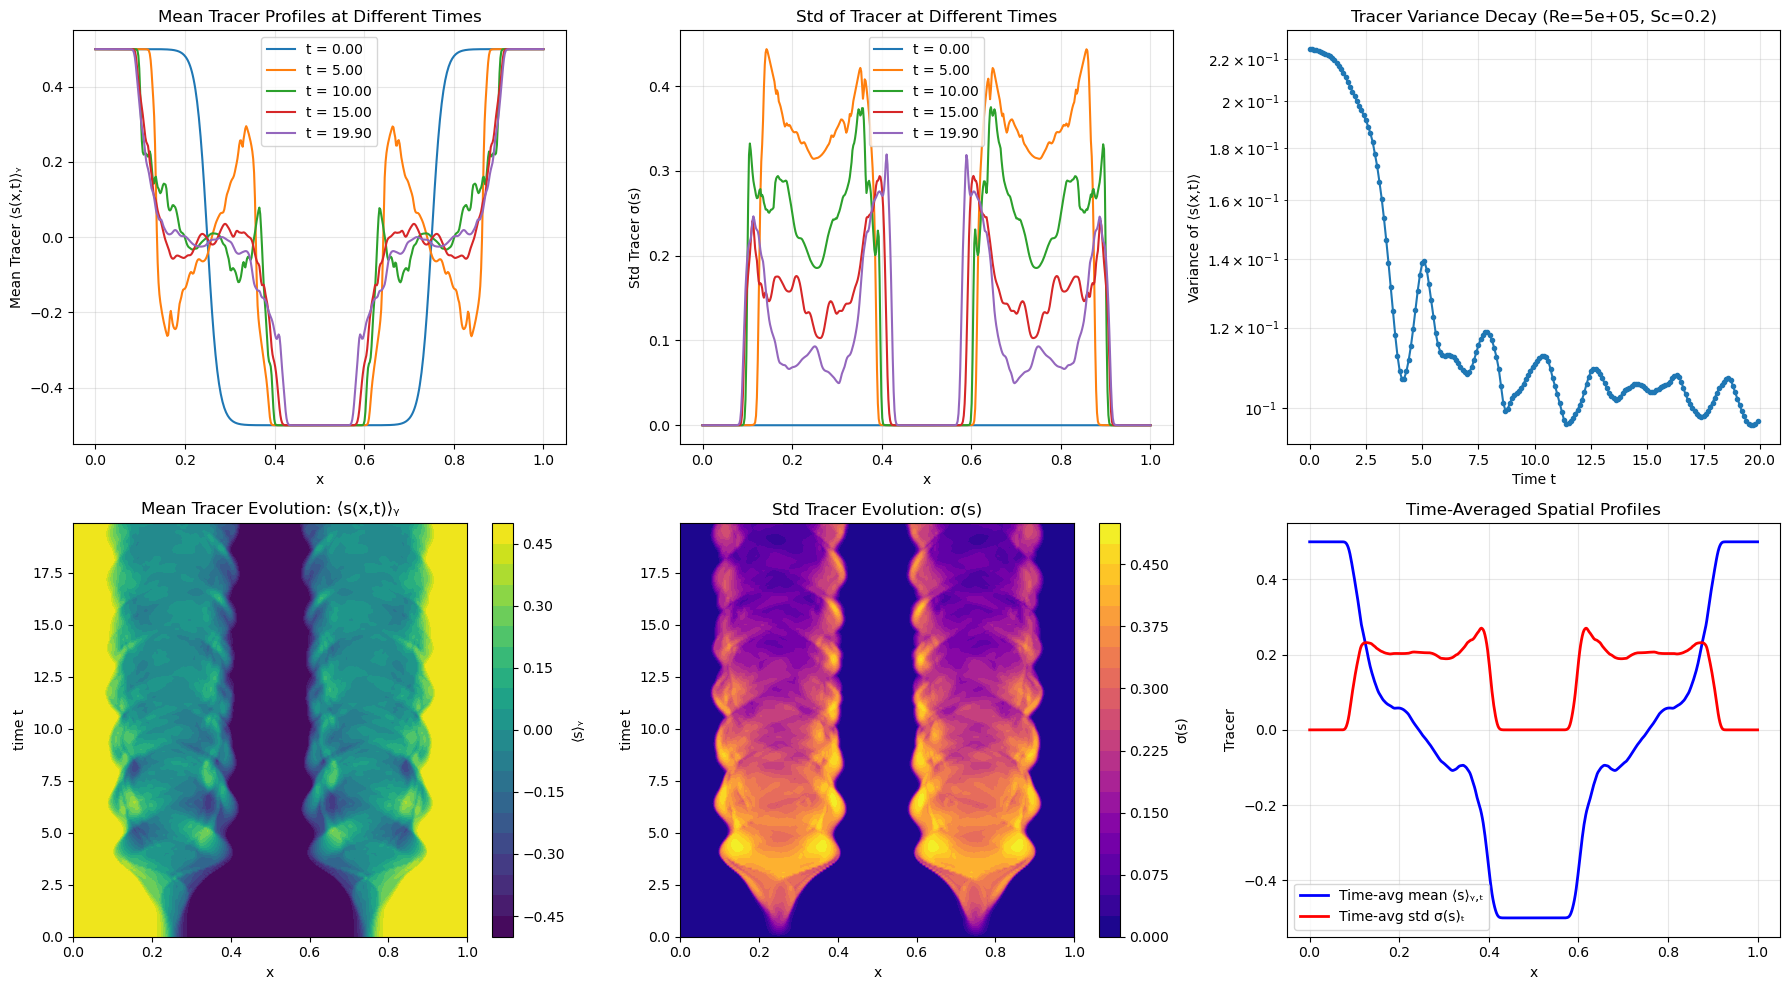


✓ Tracer visualizations complete


In [2]:
# not modified

# Extract tracer data
time = data['time']
x = data['x']
tracer_mean = data['tracer_mean']
tracer_std = data['tracer_std']

# Create figure with tracer visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Select time indices for 1D plots (start, 1/4, 1/2, 3/4, end)
n_time = len(time)
time_indices = [0, n_time//4, n_time//2, 3*n_time//4, n_time-1]

# Plot 1: Mean tracer at different time snapshots
ax = axes[0, 0]
for t_idx in time_indices:
    ax.plot(x, tracer_mean[t_idx, :], label=f't = {time[t_idx]:.2f}')
ax.set_xlabel('x')
ax.set_ylabel('Mean Tracer ⟨s(x,t)⟩ᵧ')
ax.set_title('Mean Tracer Profiles at Different Times')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Std tracer at different time snapshots
ax = axes[0, 1]
for t_idx in time_indices:
    ax.plot(x, tracer_std[t_idx, :], label=f't = {time[t_idx]:.2f}')
ax.set_xlabel('x')
ax.set_ylabel('Std Tracer σ(s)')
ax.set_title('Std of Tracer at Different Times')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Variance decay over time
ax = axes[0, 2]
variance_over_time = np.var(tracer_mean, axis=1)
ax.semilogy(time, variance_over_time, 'o-', markersize=3)
ax.set_xlabel('Time t')
ax.set_ylabel('Variance of ⟨s(x,t)⟩')
ax.set_title(f'Tracer Variance Decay (Re={Re:.0e}, Sc={Sc:.1f})')
ax.grid(True, alpha=0.3, which='both')

# Plot 4: Heatmap of mean tracer evolution
ax = axes[1, 0]
im = ax.contourf(x, time, tracer_mean, levels=20, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('time t')
ax.set_title('Mean Tracer Evolution: ⟨s(x,t)⟩ᵧ')
plt.colorbar(im, ax=ax, label='⟨s⟩ᵧ')

# Plot 5: Heatmap of std tracer evolution
ax = axes[1, 1]
im = ax.contourf(x, time, tracer_std, levels=20, cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('time t')
ax.set_title('Std Tracer Evolution: σ(s)')
plt.colorbar(im, ax=ax, label='σ(s)')

# Plot 6: Time-averaged spatial profiles
ax = axes[1, 2]
mean_spatial = np.mean(tracer_mean, axis=0)
std_spatial = np.mean(tracer_std, axis=0)
ax.plot(x, mean_spatial, 'b-', linewidth=2, label='Time-avg mean ⟨s⟩ᵧ,ₜ')
ax.plot(x, std_spatial, 'r-', linewidth=2, label='Time-avg std σ(s)ₜ')
ax.set_xlabel('x')
ax.set_ylabel('Tracer')
ax.set_title('Time-Averaged Spatial Profiles')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Tracer visualizations complete")

In [3]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cpu


In [4]:
# not modified

def build_learnableStencil_periodic(N, coeffs, device='cpu'):
    """
    Build the finite difference matrix associated with a machine learnable stencil `coeffs`

    Parameters:
    -----------
    N : int
        Number of spatial grid points
    coeffs : torch.Tensor
        Current finite difference stencil
    device : str or torch.device
        Device to place the matrix on

    Returns:
    --------
    D_h : torch.Tensor
        matrix associated with an application of the stencil (N, N)
    """
    dx = 1./N
    # In HW1 - the stencil coefficients for centered difference were given
    # coeffs = torch.tensor([1.0, -2.0, 1.0], device=device) / (dx ** 2)
    # Now we take it as an input so that we can track the derivatives through the matrix solve

    # Build tridiagonal matrix
    upper_diag = coeffs[2] * torch.ones(N - 1, device=device)
    main_diag = coeffs[1] * torch.ones(N, device=device)
    under_diag = coeffs[0] * torch.ones(N - 1, device=device)
    D_xx = torch.diag(main_diag) + torch.diag(upper_diag, diagonal=1) + torch.diag(under_diag, diagonal=-1)

    # Add periodic boundary conditions (corners)
    D_xx[0, -1] = coeffs[0]
    D_xx[-1, 0] = coeffs[-1]

    return D_xx

In [5]:
n_skip = 2 # Number of initial timesteps to skip
x_subsample = 8 # Spatial subsampling factor

x = data['x'][::x_subsample]
time_initial = data['time'][n_skip:]
tracer_mean_initial = data['tracer_mean'][n_skip:, ::x_subsample]

time = time_initial
N = len(x)
M = len(time) - 1

dx = x[1] - x[0]
dt = time[1] - time[0]

u_true_snapshots = torch.tensor(tracer_mean_initial, dtype=torch.float32).to(device)

print(f"Data preparation complete:")
print(f"  N (spatial points): {N}")
print(f"  M (training timesteps): {M}")
print(f"  dx (spatial step): {dx:.4f}")
print(f"  dt (time step): {dt:.4f}")
print(f"  u_true_snapshots shape: {u_true_snapshots.shape}")

Data preparation complete:
  N (spatial points): 64
  M (training timesteps): 197
  dx (spatial step): 0.0157
  dt (time step): 0.1000
  u_true_snapshots shape: torch.Size([198, 64])


In [6]:
init_params = torch.randn(3, device=device, dtype=torch.float32)
init_params = init_params - torch.mean(init_params)
print(init_params, torch.sum(init_params))
stencil_coeffs = torch.nn.Parameter(init_params)

tensor([-0.4548,  0.8395, -0.3847]) tensor(-2.9802e-08)


In [ ]:
import torch.optim as optim

# using LBFGS, which seemed to work much better for this.
optimizer = optim.LBFGS([stencil_coeffs], lr=0.01, max_iter=20, history_size=10)

num_epochs = 300

print(f"Initial stencil coefficients: {stencil_coeffs.data.tolist()}")
print(f"\n{'Epoch':<8} {'Loss':<15} {'Stencil':<50}")
print("-" * 80)

final_loss_item = 0.0

for epoch in range(num_epochs):
    def closure():
        optimizer.zero_grad()

        D = build_learnableStencil_periodic(N, stencil_coeffs, device=device)

        # Form implicit Euler system matrix: A = I - dt * D
        A = torch.eye(N, device=device) - dt * D

        # Simulate through all timesteps and accumulate loss
        total_loss = 0.0
        # Start from initial condition (first snapshot of true tracer_mean)
        u_current = u_true_snapshots[0].clone()

        for step in range(M): # M is the number of time steps for training
            # Solve implicit time step: A * u^{n+1} = u^n
            u_next = torch.linalg.solve(A, u_current)

            # Compare with true solution at next time step
            u_true_next = u_true_snapshots[step + 1]
            step_loss = torch.mean((u_next - u_true_next) ** 2)
            total_loss = total_loss + step_loss

            # Update for next iteration
            u_current = u_next

        # Average loss over all timesteps
        loss = total_loss / M

        # Backpropagate
        loss.backward()
        return loss

    # Update stencil coefficients
    current_epoch_loss = optimizer.step(closure)

    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f"{epoch:<8} {current_epoch_loss.item():<15.2e} {stencil_coeffs.data.tolist()}")

    if epoch == num_epochs - 1:
        final_loss_item = current_epoch_loss.item()

print("\n" + "=" * 80)
print("Training complete!")
print(f"Learned stencil: {stencil_coeffs.data.tolist()}")
print(f"Final loss:      {final_loss_item:.2e}")

Initial stencil coefficients: [-0.4548003375530243, 0.8395030498504639, -0.38470274209976196]

Epoch    Loss            Stencil                                           
--------------------------------------------------------------------------------
0        7.52e+20        [-0.4501657783985138, 0.8346392512321472, -0.38006091117858887]
100      1.17e+12        [-0.36422497034072876, 0.5626327395439148, -0.2884620428085327]



Generating comparison plot...


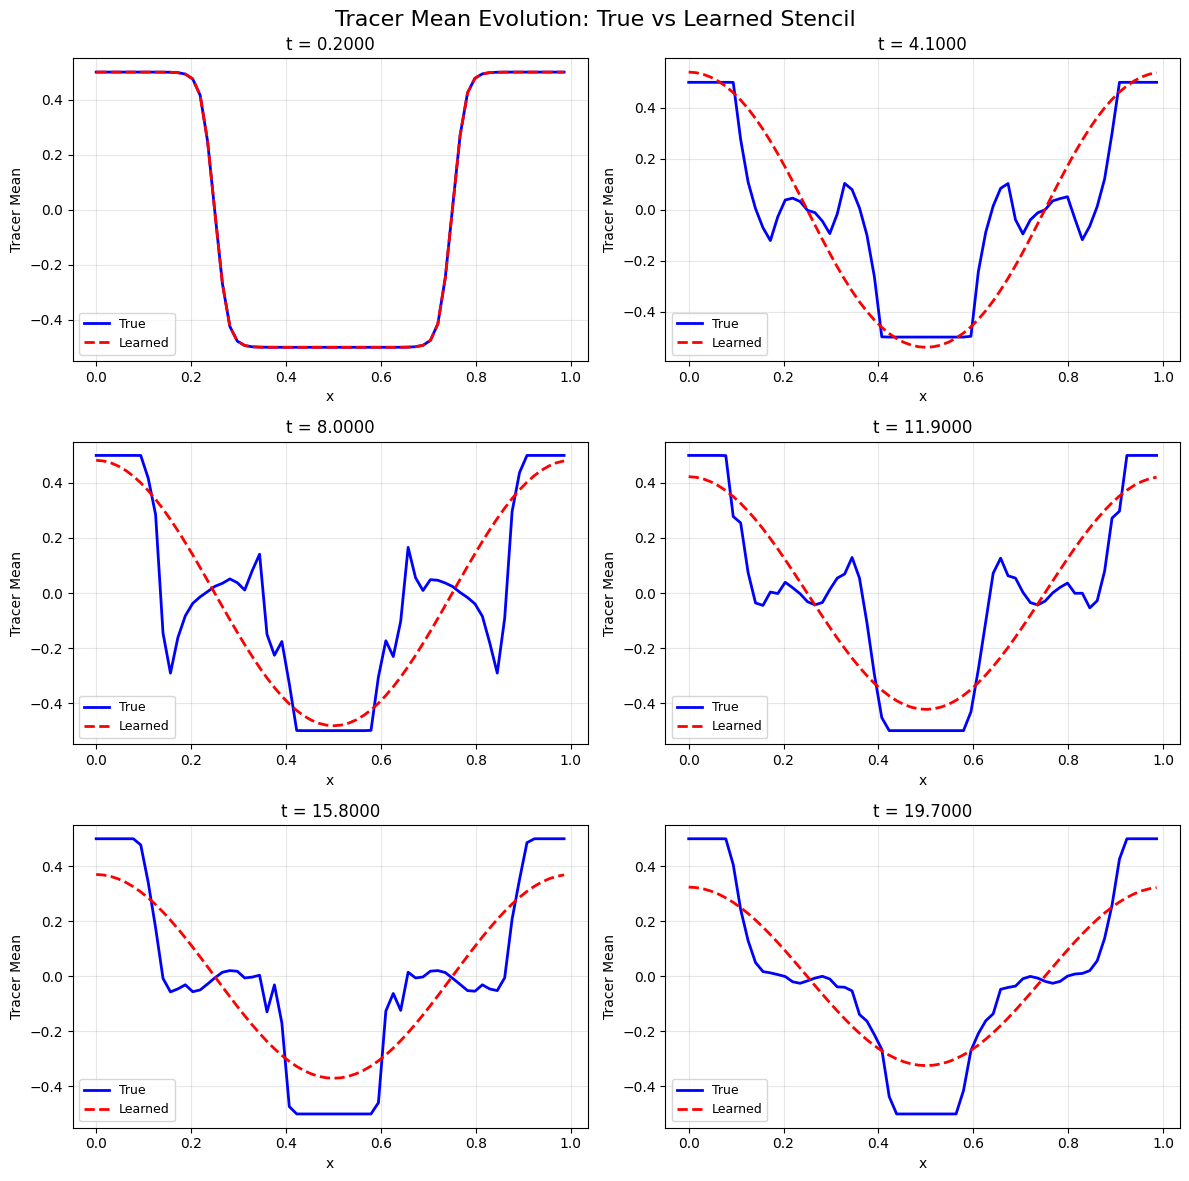

In [ ]:
import matplotlib.pyplot as plt

# reuse previous plot

# Roll out the learned stencil and compare to training data
print("\nGenerating comparison plot...")

# Simulate with learned stencil
D_learned = build_learnableStencil_periodic(N, stencil_coeffs.data, device=device)
A_learned = torch.eye(N, device=device) - dt * D_learned

u_learned_history = torch.zeros(M + 1, N, device=device)
u_learned_history[0] = u_true_snapshots[0].clone()  # Initial condition

for step in range(M):
    u_learned_history[step + 1] = torch.linalg.solve(A_learned, u_learned_history[step])

# Convert to numpy for plotting
x_plot = x
t_plot = time
u_true_plot = u_true_snapshots.cpu().numpy()
u_learned_plot = u_learned_history.cpu().numpy()

# Create comparison plot with 3x2 grid (6 snapshots)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Tracer Mean Evolution: True vs Learned Stencil', fontsize=16)

# Select 6 evenly spaced time snapshots
num_snapshots = 6
snapshot_indices = [int(i * M / (num_snapshots - 1)) for i in range(num_snapshots)]
# Make sure the last index is exactly M
snapshot_indices[-1] = M

for idx, snap_idx in enumerate(snapshot_indices):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    ax.plot(x_plot, u_true_plot[snap_idx], 'b-', linewidth=2, label='True')
    ax.plot(x_plot, u_learned_plot[snap_idx], 'r--', linewidth=2, label='Learned')
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('Tracer Mean', fontsize=10)
    ax.set_title(f't = {t_plot[snap_idx]:.4f}', fontsize=12)
    # ax.set_ylim([0, 1])  # Fix y-axis to [0, 1] for tracer mean visualization
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

(64,) (196,) (196, 64) (196, 64) (196, 64)


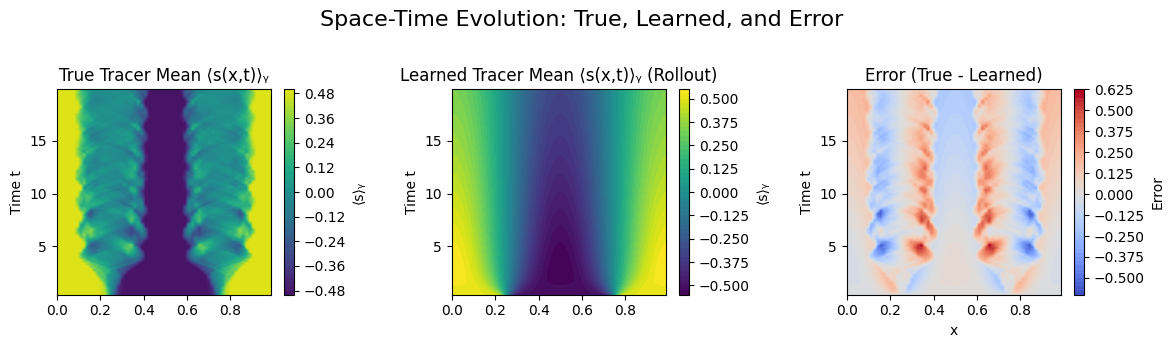

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t_plot = time[2:]

u_error_plot = u_true_plot - u_learned_plot

common_vmin_tracer = min(u_true_plot.min(), u_learned_plot.min())
common_vmax_tracer = max(u_true_plot.max(), u_learned_plot.max())

max_abs_error = np.max(np.abs(u_error_plot))
common_vmin_error = -max_abs_error
common_vmax_error = max_abs_error

fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), sharex=True)
fig.suptitle('Space-Time Evolution: True, Learned, and Error', fontsize=16)

print(x_plot.shape, t_plot.shape, u_true_plot.shape, u_learned_plot.shape, u_error_plot.shape)

ax0 = axes[0]
im0 = ax0.contourf(x_plot, t_plot, u_true_plot, levels=50, cmap='viridis', vmin=common_vmin_tracer, vmax=common_vmax_tracer)
ax0.set_ylabel('Time t')
ax0.set_title('True Tracer Mean ⟨s(x,t)⟩ᵧ')
plt.colorbar(im0, ax=ax0, label='⟨s⟩ᵧ')

ax1 = axes[1]
im1 = ax1.contourf(x_plot, t_plot, u_learned_plot, levels=50, cmap='viridis', vmin=common_vmin_tracer, vmax=common_vmax_tracer)
ax1.set_ylabel('Time t')
ax1.set_title('Learned Tracer Mean ⟨s(x,t)⟩ᵧ (Rollout)')
plt.colorbar(im1, ax=ax1, label='⟨s⟩ᵧ')

ax2 = axes[2]
im2 = ax2.contourf(x_plot, t_plot, u_error_plot, levels=50, cmap='coolwarm', vmin=common_vmin_error, vmax=common_vmax_error)
ax2.set_xlabel('x')
ax2.set_ylabel('Time t')
ax2.set_title('Error (True - Learned)')
plt.colorbar(im2, ax=ax2, label='Error')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
